In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("version of numpy: ", np.__version__)
print("version of pandas: ", pd.__version__)

version of numpy:  1.21.5
version of pandas:  1.4.4


# Movie Data
the data is from IMDB an internet movie data set, we'll go throught the data first:

1.1. Importing the data

In [90]:
data = pd.read_csv('movie_metadata.csv')

print(f'shape of the data: {data.shape[0]} rows and {data.shape[1]} columns')

data.head()

shape of the data: 5043 rows and 28 columns


,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


1.2. The duration column contains data on the film length. How many missing values are there
in this column?

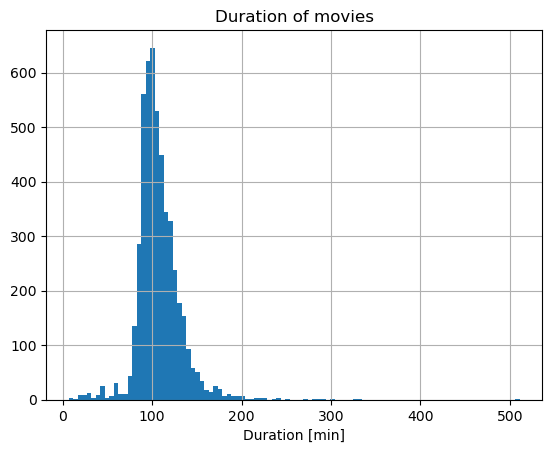

count    5028.000000
mean      107.201074
std        25.197441
min         7.000000
25%        93.000000
50%       103.000000
75%       118.000000
max       511.000000
Name: duration, dtype: float64

In [91]:
data['duration'].hist(bins=100)
plt.title('Duration of movies')
plt.xlabel('Duration [min]')
plt.show()

data['duration'].describe()

In [92]:
# missing values in the column of duration
data['duration'].isnull().sum()

15

1.3. Replace the missing values in the duration column with the median value for this column.


In [93]:
# inplache works on the same object
data['duration'].fillna(data['duration'].median(), inplace=True)
data['duration'].isnull().sum() # no missing values

0

1.4. What is the average film length? Give the answer as a floating-point figure rounded to
two decimal places.

In [94]:
# The average film length? Give the answer as a floating-point figure rounded totwo decimal places.
print(f'The average film length is {data["duration"].mean():.2f} minutes')

The average film length is 107.19 minutes


1.5. Create a movie_duration_category column, which will contain three categories
depending on the film length:

• Category "1. <90" if the film is less than 90 minutes long

• Category "2. 90–120" if the film is between 90 minutes and two hours long (inclusively)

• Category "3. >120" if the film is more than two hours long

In [95]:
# lambda functions allow us to create a function on the fly
data['movie_duration_category'] = data['duration'].apply(lambda x: 1 if x < 90 else 2 if x < 120 else 3)

# showing the head of the data with the new column
data[['duration', 'movie_duration_category']].head()

,duration,movie_duration_category
0,178.0,3
1,169.0,3
2,148.0,3
3,164.0,3
4,103.0,2


1.6. Build a summary table for films released after 2000 (inclusively), to list the numbers of
films:

• Table rows: year

• Table columns: movie duration category ("<90", "90–120", ">120")

• The year of release should be displayed in the YYYY format.


In [96]:
# groupby and unstack to create a pivot table
# fillna(0) to replace NaN values with 0
# astype(int) to convert the values to integers
data[data['title_year'] >= 2000].groupby('movie_duration_category')['title_year'].value_counts().unstack().fillna(0).astype(int)

title_year,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
movie_duration_category,,,,,,,,,,,,,,,,,
1,25,29,36,31,30,31,40,31,29,42,26,36,41,38,36,34,8
2,108,118,145,104,134,141,142,126,157,174,169,149,139,141,170,142,72
3,38,41,28,34,50,49,57,47,39,44,35,40,41,58,46,50,26


1.7. How many films between 90 minutes and two hours long were released in 2008?


In [97]:
# the code works as:
# data [ conditions ] [column with values to count].count()
data[(data['movie_duration_category'] == 2) & (data['title_year'] == 2008) ]['movie_title'].count()

# remember movie_duration_category 2 is between 90 and 120 minutes

157

1.8. The plot_keywords column holds keywords characterizing the film's plot. Using the data
in this column, create a column called movie_plot_category, to contain four categories
depending on the key words in the column:

• Category "love_and_death" if the keywords include both "love" and "death"

• Category "love" if the keywords include the word "love"

• Category "death" if the keywords include the word "death"

• Category "other" if the keywords do not meet the conditions above

In [98]:
# amount fo Nans in the column
print(f"Amount of Not a number in the column {data['plot_keywords'].isnull().sum() }")

data['plot_keywords'].head()

Amount of Not a number in the column 153


0               avatar|future|marine|native|paraplegic
1    goddess|marriage ceremony|marriage proposal|pi...
2                  bomb|espionage|sequel|spy|terrorist
3    deception|imprisonment|lawlessness|police offi...
4                                                  NaN
Name: plot_keywords, dtype: object

In [99]:
# lets convert the Nan values to empty strings or we will get an error
data['plot_keywords'].fillna('', inplace=True)

# using plot_keywords column, create a column called movie_plot_category, category "love_and_death" if the movie has the words "love" and "death" in the plot_keywords column, category "love" if the movie has the word "love" in the plot_keywords column, category "death" if the movie has the word "death" in the plot_keywords column, category "other" otherwise.
data['movie_plot_category'] = data['plot_keywords'].apply(lambda x: 'love_and_death' if 'love' in x and 'death' in x else 'love' if 'love' in x else 'death' if 'death' in x else 'other')

data[data['movie_plot_category'] == 'love_and_death'][['movie_title', 'plot_keywords', 'movie_plot_category']].head()


,movie_title,plot_keywords,movie_plot_category
594,Vanilla Sky,death|dream|love|lynchian|reality,love_and_death
766,Practical Magic,curse|death|island|love|magic,love_and_death
966,Hansel & Gretel: Witch Hunters,bounty hunter|brother sister team|death of lov...,love_and_death
1145,Underworld: Evolution,death|feud|forbidden love|vampire|werewolf,love_and_death
1167,Red Riding Hood,death|forest|love|werewolf|werewolf bite,love_and_death


1.9 The imdb_score column shows a viewer rating for the film. Build a table to reflect the
average rating of films depending on which movie_plot_category category they belong to.

In [100]:
# groupby will group the data by the column movie_plot_category and then we will calculate the mean of the imdb_score column
# normally if you're asked to build a table, you will use groupby
category_ratings = data.groupby('movie_plot_category')['imdb_score'].mean().reset_index()



1.10. What is the average rating of films in the "love" category? Give the answer as a floating point figure rounded to two decimal places.

In [101]:
print(f"Average rating of films in the 'love' category: {category_ratings.loc[category_ratings['movie_plot_category'] == 'love', 'imdb_score'].mean():.2f}")


Average rating of films in the 'love' category: 6.58


1.11. The budget column contains the film's budget. What is the median budget for all the films listed? Give the answer as an integer.

In [102]:
print("How the budget column looks like:")
print(data['budget'].head())

print("Deleting the '$' sign from the budget column so its easier to convert to a float:")
print(data['budget'].map(lambda x: x[:-1]).head())

How the budget column looks like:
0    237000000.0$
1    300000000.0$
2    245000000.0$
3    250000000.0$
4            0.0$
Name: budget, dtype: object
Deleting the '$' sign from the budget column so its easier to convert to a float:
0    237000000.0
1    300000000.0
2    245000000.0
3    250000000.0
4            0.0
Name: budget, dtype: object


In [103]:
# convert the budget column to float
data['budget'] = data['budget'].map(lambda x: x[:-1]).astype(float)

print(f"Median budget of movies: {int(data['budget'].median())}")

Median budget of movies: 15000000
